# Аналитическое и численное обучение линейной регрессии в sklearn

In [4]:
import numpy as np

In [5]:
import sklearn.datasets

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

### Генерация данных

Генерируем синтетические одномерные данные:

In [7]:
X, y, coef = sklearn.datasets.make_regression(n_samples=100, 
                                              n_features=2, 
                                              n_informative=1, 
                                              n_targets=1, 
                                              bias=1000, 
                                              noise=10, 
                                              coef=True)

In [8]:
X.shape, y.shape

((100, 2), (100,))

In [9]:
coef

array([ 82.23677673,   0.        ])

Один из коэффициентов получился нулевым, потому что мы указали n_informative=1.
Обратите внимание на большой по модулю свободный член: bias=1000.

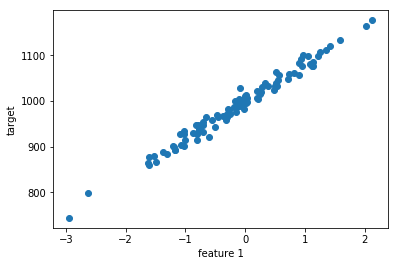

Text(0,0.5,'target')

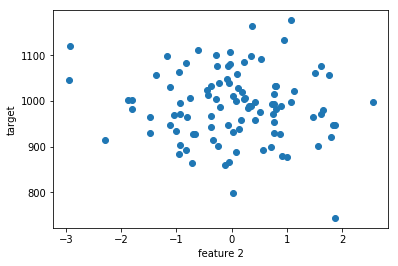

In [13]:
plt.scatter(X[:, 0], y)
plt.xlabel("feature 1")
plt.ylabel("target")
plt.show()
plt.scatter(X[:, 1], y)
plt.xlabel("feature 2")
plt.ylabel("target")

### Использование аналитического решения для линейной регрессии

Самый простой способ обучать линейную регрессию - с помощью класса LinearRegression. У него 2 значиымх параметра - обучать ли свободный член и надо ли нормировать выборку. Нашу синтетическую выборку нормировать не надо.

In [14]:
import sklearn.linear_model

In [16]:
reg = sklearn.linear_model.LinearRegression(fit_intercept=True,
                                            normalize=False)

In [17]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
reg.coef_

array([ 82.01288754,  -1.61086219])

Визуализируем получившуся прямую:

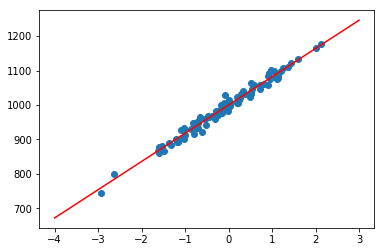

In [20]:
grid = np.linspace(-4, 3, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

### Важность настройки свободного члена

Попробуем не настраивать свободный член:

In [21]:
reg = sklearn.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

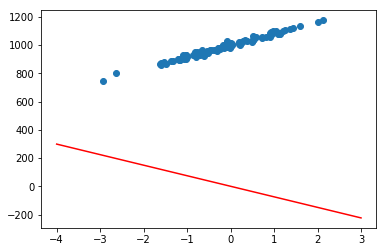

In [22]:
grid = np.linspace(-4, 3, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

Модель нашла "наилучшую" прямую, проходящую через начало координат.

### Использование градиентного спуска для обучения линейной регрессии

LinearRegression обычно хорошо работает без дополнительных усилий. На большинстве задач она использует аналитическую формулу для весов, что может заниматть много времени. Поэтому есть [другой класс](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), в котором реализован градиентный спуск (у него гораздо больше параметров):

In [44]:
X[:, 0] /= 100

In [45]:
reg = sklearn.linear_model.SGDRegressor(alpha=0, # no regularization
                                        n_iter=100)
reg.fit(X, y)

/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=100, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [46]:
reg.n_iter_

100

In [47]:
reg.coef_ # fitted coef

array([ 81.99477088,  -1.60860789])

In [48]:
coef # actual coef

array([ 82.23677673,   0.        ])

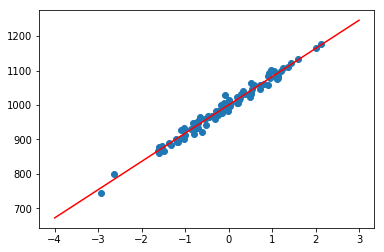

In [49]:
grid = np.linspace(-4, 3, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

### Сложности оптимизации с немасштабированными данными

Когда признаки разного масштаба, оптимизационный методы сходятся плохо

In [30]:
X[:, 0] *= 100

In [31]:
reg = sklearn.linear_model.SGDRegressor(alpha=0, # no regularization
                                        n_iter=100)
reg.fit(X, y)

/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=100, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

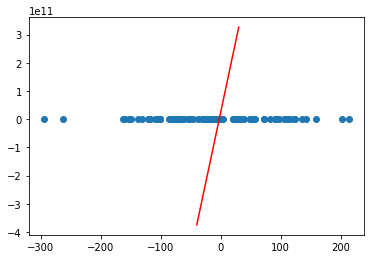

In [32]:
grid = np.linspace(-40, 30, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

Просто нужно больше итераций:

In [92]:
reg = sklearn.linear_model.SGDRegressor(alpha=0, # no regularization
                                        n_iter=1000)
reg.fit(X, y)

/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=1000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

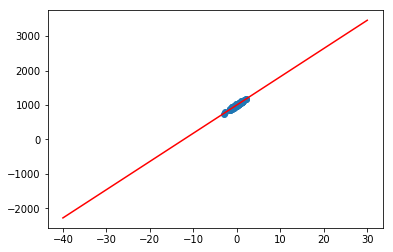

In [93]:
grid = np.linspace(-40, 30, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

### Обучение линейной регрессии на данных с выбросами

Возвращаем обратно масштаб признака:

In [43]:
X[:, 0] /= 100

Добавляем шум:

In [51]:
X_add = np.array([[-30, 0], [40, 2], [10, 4]])

In [52]:
X = np.vstack((X, X_add))

In [53]:
y = np.hstack((y, [1300, 2000, 1500]))

In [54]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

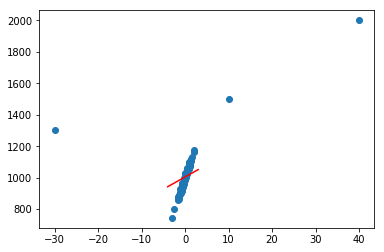

In [55]:
grid = np.linspace(-4, 3, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")

Мы видим, что модель очень сильно реагирует на шумовые точки. Избежать этого эффекта можно, используя другую функцию потерь (не квадратичную, как с методе наименьших квадратов). Например, среднее абсолютное отклонение или [HuberLoss](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%A5%D1%8C%D1%8E%D0%B1%D0%B5%D1%80%D0%B0).

In [83]:
reg = sklearn.linear_model.SGDRegressor("huber", alpha=0, n_iter=3000, eta0=0.1, learning_rate="constant")
reg.fit(X, y)

/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='huber', max_iter=None, n_iter=3000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

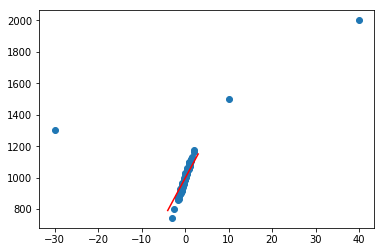

In [84]:
grid = np.linspace(-4, 3, 1000)
grid_y = reg.coef_[0]*grid + reg.intercept_
plt.scatter(X[:, 0], y)
plt.plot(grid, grid_y, color="Red")